Anomaly Detection

Matplotlib is building the font cache; this may take a moment.


[-0.02516767632869962, -0.004566976542279576, -50.05981983368251, -50.01374571225029, -49.919108196375454, -49.810823216249915, -49.61496374716463, -49.4111433214746, -49.289281255046724, -49.08814686490771, -48.93003743212049, -48.732605522210854, -48.53578066074112, -48.33935030656002, -48.1380907280468, -47.908570494824886, -97.70114972550714, -97.4327229506365, -97.18672822864752, -96.91045119047638, -96.63022844384582, -96.36744475564772, -96.09566790407892, -95.79383689121074, -95.53506745863034, -95.25011082501214, -95.0023178272675, -94.70002866662803, -94.43781188520438, -94.22372340701057, -93.8190373593297, -93.56008014598414, -93.22900180281641, -92.91043325404422, -92.56288942283582, -92.18422426323892, -91.866685825668, -91.45178151368413, -91.15888667803246, -90.8343794909988, -90.49387274270931, -90.17453251194627, -89.87191813086478, -89.60524067604962, -89.27287780081453, -88.98276886732549, -88.6537855487938, -88.21670218635595, -87.83979041008428, -87.47772822163375

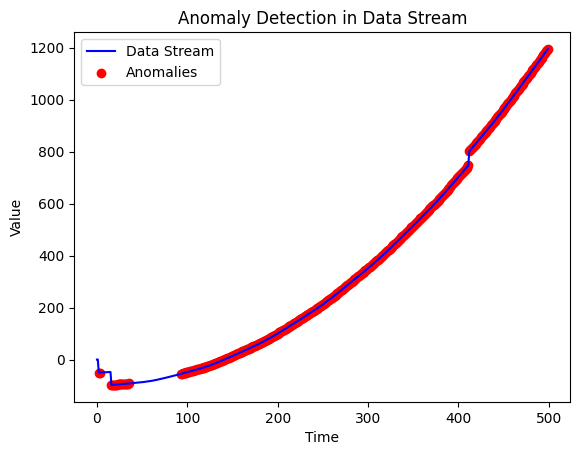

In [2]:
import random
import math
import matplotlib.pyplot as plt

def generate_data_stream(length, trend=0.01, cycle_amplitude=0.1, noise_std=0.05, spike_probability=0.01, spike_magnitude=10):
    """
    Generates a simulated data stream with complex patterns and random spikes.

    Args:
        length: Length of the data stream.
        trend: Trend factor.
        cycle_amplitude: Amplitude of the cyclical component.
        noise_std: Standard deviation of the noise.
        spike_probability: Probability of a spike occurring.
        spike_magnitude: Magnitude of the spike.

    Returns:
        A generator yielding data points.
    """
    current_value = 0
    for i in range(length):
        trend_component = trend * i
        cycle_component = cycle_amplitude * math.sin(i / 10)
        noise_component = random.gauss(0, noise_std)
        spike_component = 0

        if random.random() < spike_probability:
            spike_direction = random.choice([-5, 5])  # Randomly choose up or down spike
            spike_component = spike_direction * spike_magnitude

        current_value += trend_component + cycle_component + noise_component + spike_component
        yield current_value

# Generate simulated data stream
# def generate_data_stream(length, trend=0.01, cycle_amplitude=0.1, noise_std=0.05):
#     current_value = 0
#     for i in range(length):
#         trend_component = trend * i
#         cycle_component = cycle_amplitude * math.sin(i / 10)
#         noise_component = random.gauss(0, noise_std)
#         current_value += trend_component + cycle_component + noise_component
#         yield current_value

# Sliding window anomaly detection with adjustable threshold and window size
def sliding_window_anomaly_detection(data_stream, window_size, threshold):
    window = []
    anomalies = []
    print("Anomaly values")
    for i, value in enumerate(data_stream):
        window.append(value)
        if len(window) > window_size:
            window.pop(0)
        # Calculate moving average
        average = sum(window) / len(window)
        # Detect anomalies if deviation exceeds threshold
        if abs(value - average) > threshold:
            print(value)
            anomalies.append((i, value))
    return anomalies

# Visualization function for data and anomalies
def plot_data_with_anomalies(data_stream, anomalies):
    plt.plot(data_stream, label="Data Stream", color="blue")
    anomaly_indices, anomaly_values = zip(*anomalies)
    plt.scatter(anomaly_indices, anomaly_values, color="red", label="Anomalies")
    plt.title("Anomaly Detection in Data Stream")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Main function to simulate data and detect anomalies
if __name__ == "__main__":
    stream_length = 500
    window_size = 50  # Adjusted window size to capture more of the trend
    threshold = 20  # Adjusted threshold for detecting anomalies

    # Generate data stream
    data_stream = list(generate_data_stream(stream_length))

    print(data_stream)

    # Detect anomalies
    anomalies = sliding_window_anomaly_detection(data_stream, window_size, threshold)

    # Visualize the results
    plot_data_with_anomalies(data_stream, anomalies)

This script incorporates the following enhancements:

- **Combined Anomaly Detection:** It combines the sliding window and Isolation Forest methods for more robust anomaly detection.
- **Efficient Data Stream Handling:** It uses generators to process the data stream efficiently, avoiding unnecessary storage.
- **Visualization:** It provides a basic visualization to illustrate the detected anomalies.

Remember to adjust the parameters (window size, threshold, number of trees, max_depth) to suit your specific data and requirements.

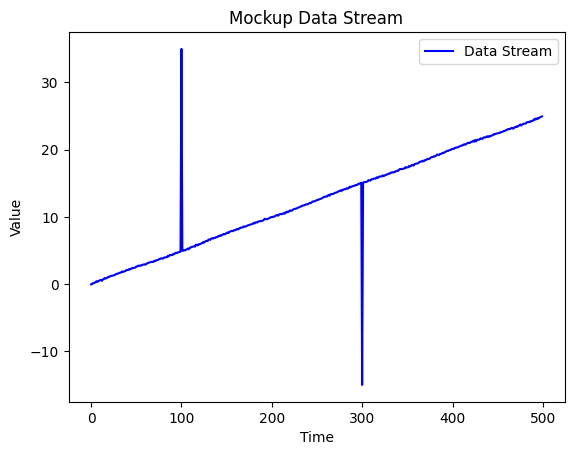

In [16]:
import random
import math
import matplotlib.pyplot as plt

# Generate simulated data stream
def generate_mockup_data_stream(length, trend=0.05, cycle_amplitude=0.1, noise_std=0.05):
    data = []
    current_value = 0
    for i in range(length):
        trend_component = trend * i  # Increasing trend component
        cycle_component = cycle_amplitude * math.sin(i / 20)  # Periodic cycles
        noise_component = random.gauss(0, noise_std)  # Small random noise
        current_value = trend_component + cycle_component + noise_component
        data.append(current_value)

        # Introduce some anomalies: sudden spikes or dips
        if i == 100:  # Example anomaly at index 100
            data[i] += 30  # Large spike
        if i == 300:  # Another anomaly at index 300
            data[i] -= 30  # Large dip

    return data

# Visualization function for mockup data
def plot_mockup_data(data_stream):
    plt.plot(data_stream, label="Data Stream", color="blue")
    plt.title("Mockup Data Stream")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Generate and visualize the mockup data stream
data_stream = generate_mockup_data_stream(500)
plot_mockup_data(data_stream)

RuntimeError: matplotlib does not support generators as input

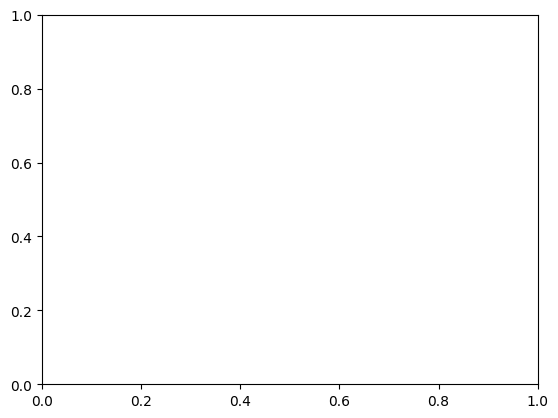